### Student id
Fill in your student id in the cell below and run the subsequent cell to load your personalized multiple choice questions. Contact us immediately if this is not working.

In [3]:
# Enter your student id (c-number) as a string
STUDENT_ID = 'csat5711'

In [4]:
from multiple_choice_test import MultipleChoiceTest, display_html, make_magic

path = '19-05-2020_midterm_introduction_to_machine_learning_ps_v1.0.yaml.gz'
assert STUDENT_ID is not None, "Specify your student id in the cell above"
test = MultipleChoiceTest.load(path, STUDENT_ID)
make_magic(test)

# Overview <a name="overview" />
The midterm consists of 4 parts, each part will cover one topic and has one or more programming problems and one multiple choice question. The total exam constists of 60 points, each part will be worth 15 points.

- <a href=#logistic_regression>Part 1: Logistic Regression, Decision Theory, and Basic Classifiers</a>
- <a href=#decision_trees>Part 2: Decision Trees</a>
- <a href=#svm>Part 3: Support Vector Machines</a>
- <a href=#neural_networks>Part 4: Neural Networks</a>

### <font color="red">Important Notes</font>

- Download all files to work locally (`multiple_choice_test.py`, `19-05-2020_midterm_introduction_to_machine_learning_ps_v1.0.yaml.gz`, `requirements_midterm.txt` and this notebook). Make sure they are placed in the same directory. This notebook is the exam, you don't have to do anything in the other files.
- The deadline for submitting your midterm is 11:15. You are allowed to submit multiple times, your last submission will count.
- Don't forget to fill in your student id above and execute the first two code cells.
- The 4 parts are independent and can be solved in any order.
- Please ignore the error: ```cannot import name 'operatorPrecedence'``` if it appears.

### Programming Tasks
For the programming tasks you will need to replace the following comment and exception with your own code:

```python
# YOUR CODE HERE
raise NotImplementedError()
```

Most programming tasks are followed by a cell with tests (using the `assert` function from python). You can use these cells while developing your implementation and for validating your implementation.

**<font size="3" color="red">Note</font>**: The `@contract` decorators make sure the data types and shapes are correct for the inputs and outputs. See [here](https://andreacensi.github.io/contracts/tour.html#quick-tour) for more. If you are more comfortable working without these, you can comment out the lines starting with `@contract`. However, in that case it can get tedious to locate the exact source of a bug.

### Multiple Choice Questions
The notebook also contains one multiple choice question per topic, each multiple choice question has four possible answers. Below each cell for displaying the multiple choice question you will find a cell to answer the question, for question `x` this looks like:

```
%%answer_for_question x
answer = None
```

here you have to replace `None` with your answer `'A'`, `'B'`, `'C'` or `'D'`. Make sure that your answer is a character (enclosed in `''` or `""`). 

At the bottom of the notebook you will find a cell for validating whether you have answered all multiple choice questions. <a href=#validate_mpc>[go to validate multiple choice questions]</a>

In [6]:
# DO NOT INSTALL THE LIBRARIES WHEN WORKING ON ifi-europa.uibk.ac.at

# Make sure that the required libraries are installed
# If you are using Google Colab, remember to upload the requirements file before 
# running this cell
# If you are running this notebook locally, the requirements file needs to be in 
# the same location as this notebook
import os
running_local = True if os.getenv('JUPYTERHUB_USER') is None else False
    
if running_local:
    import sys
    !{sys.executable} -m pip install -r requirements_midterm.txt

In [7]:
from collections import namedtuple

import numpy as np
from numpy.random import Generator, PCG64, SeedSequence
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from tqdm.notebook import tqdm, trange
from contracts import contract
from IPython.display import set_matplotlib_formats

# Random seed for reproducability
random_seed = 123
np.random.seed(random_seed)

%matplotlib inline
set_matplotlib_formats('svg')

<a href=#overview> [go to Overview] </a>
# Part 1: Logistic Regression, Decision Theory, and Basic Classifiers <a name='logistic_regression' />


- <a href=#logistic_regression_1>Problem 1 - Decision Theory (5 Points)</a>
- <a href=#logistic_regression_2>Problem 2 - Logistic Regression (7 Points)</a>
- <a href=#logistic_regression_mpc>Multiple Choice Question (3 Points)</a>

<a href=#logistic_regression> [go to top Logistic Regression] </a>
### Problem 1 - Decision Theory (2 + 3 Points)<a name='logistic_regression_1' />

Consider the $N$ $3$-dimensional Gaussian classes $\omega_1,\,\omega_2,\,\ldots,\,\omega_N$. Implement a classifier based on the MAP discriminant functions:

$g_i(\mathbf{x}) = -\frac{1}{2}(\mathbf{x}-\mathbf{\mu}_i)^T\mathbf{\Sigma}_i^{-1}(\mathbf{x}-\mathbf{\mu}_i) + \text{ln}\, p(\omega_i),~i=1,2,\ldots,N$,

where $\mathbf{\mu}_i$ are the mean vectors and $\mathbf{\Sigma}_i$ the covariance matrices.

In [10]:
def discriminant_function(prior, mean, covariance, x):
    """
    :param prior: prior probability of the class (type: float)
    :param mean: mean vector (type: numpy array of shape (3,))
    :param covariance: covariance matrix (type: numpy array of shape (3,3))
    :param x: input sample (type: numpy array of shape (3,))
    
    :returns g: scalar (type: float)
    """
    
    # YOUR CODE HERE
    
    
    
    raise NotImplementedError()
    
    return g

In [ ]:
# Asserts
p_test = 0.1
m_test = np.array([1, 2, 3])
c_test = 0.1*np.identity(3)
x_test = np.array([2, 3, 4])

g = discriminant_function(p_test, m_test, c_test, x_test)

assert np.isscalar(g), \
"The output of discriminant_function() is not a scalar"

assert np.allclose(g, -17.3, atol=0.01), \
"The output of discriminant_function() does not match the expected value -17.3"


In [ ]:
def map_classifier(priors, means, covariances, x, num_classes):
    """
    Maximum A Posteriori (MAP) classifier 
    :param prior: prior probability of each class (type: numpy array of shape (num_classes,))
    :param means: mean vector of each class (type: numpy array of shape (num_classes,3))
    :param covariances: covariance matrix of each class (type: numpy array of shape (num_classes,3,3))
    :param x: input sample (type: numpy array of shape (3,))
    :param num_classes: number of classes (type: int)
    
    :returns class_label: class label, an integer between [0,...,num_classes-1] (type: int)
    """

    # YOUR CODE HERE
    raise NotImplementedError()
    
    return class_label

In [ ]:
# Asserts
num_classes = 2
p_test_2 = np.array([0.7, 0.2])
m_test_2 = np.array([[1, 2, 3],[1, 2, 3]])
c_test_2 = np.array([0.1*np.identity(3), 0.01*np.identity(3)])
x_test = np.array([2, 3, 4])

c = map_classifier(p_test_2, m_test_2, c_test_2, x_test, num_classes)

assert np.isscalar(c), \
"The output of map_classifier() is not a scalar"

assert c==0, \
"The class label is not correct"


<a href=#logistic_regression> [go to top Logistic Regression] </a>
### Problem 2 - Logistic Regression (1 + 3 + 3 Points)<a name='logistic_regression_2' />

Implement a Regularized Logistic Regression classifier using the loss function defined as:

$l(\mathbf{w}) = - \frac{1}{N} \sum^{N}_{i=1} \left[y_i\ln f(\mathbf{x}_i)+(1-y_i)\ln(1-f(\mathbf{x}_i) + \epsilon)\right] + \frac{\lambda}{2N} \sum^{M}_{j=1} w_j^2$

where:
- $f(\mathbf{x}) = \sigma(\mathbf{w}^{T}\mathbf{x})$ and $\sigma(\cdot)$ is the sigmoid function defined as $\sigma(z) = \frac{1}{1+e^{-z}}$
- $N$ is the total number of points in the training set
- $M$ is the dimension of the feature space, i.e. $\mathbf{x}\in\mathbb{R}^{M}$
- $M+1$ is the dimension of the parameter space, i.e. $\mathbf{w}\in\mathbb{R}^{M+1}$
- Recall that $\mathbf{x}$ is augmented as $\mathbf{x} = [1,\,\mathbf{x}^T]^T$ to compactly write $\mathbf{w}^T \mathbf{x}$ 
- $\lambda$ is a regularization factor
- $\epsilon$ is a small positive constant. Use ```eps = 1e-15```

#### Note 

The term $\frac{\lambda}{2N} \sum^{M}_{j=1} w_j^2$ does not include $w_0$. Take this into account while computing the loss and its gradient.

In [11]:
# Implement the sigmoid function
def logistic_sigmoid(z):
    """
    :param z: input sample (type: float)
    
    :returns sigma: the sigmoid of the input sample (type: float)
    """
    
    # YOUR CODE HERE
    sigma = 1/(1 + np.exp(- z))
    # raise NotImplementedError()
    
    return sigma

In [12]:
c = logistic_sigmoid(0.1)

assert np.allclose(c, 0.52, atol=0.01), \
"The output of sigmoid() does not match the expected value 0.52"


In [31]:
def loss_function_regularized(w, x, y, regularization_factor):
    """
    Pay attention to the data shapes while implementing the function
    
    :params w: weigths (type: numpy array of shape (M+1,))
    :params x: input training samples (type: numpy array of shape (M+1, N))
    :params y: output training samples (type: numpy array of shape (N,))
    :params regularization_factor: regularization factor (type: float) 
    
    :returns J: loss (type: float)
    """
    
    # YOUR CODE HERE
    eps = 1e-15
    x=[1,x.T]
    x = np.transpose(x)
    
    
    N = len(y)
    
    f_x = logistic_sigmoid(np.dot(x, w))
        
    J = - (np.dot(y, np.log(f_x)) + np.dot((1 - y), np.log(1 - f_x + eps))) / N + regularization_factor/2*N,(np.dot(w,w))

    #raise NotImplementedError()
    
    return J

In [32]:
w = np.zeros(3)
x = np.column_stack(([1, 0, 1],[1, -1, 1]))
y = np.array([1,0])
regularization_factor = 0.1

J1 = loss_function_regularized(w, x, y, regularization_factor)

assert np.allclose(J1, 0.69, atol=0.01), \
"The output of loss_function_regularized() does not match the expected value 0.69"


TypeError: bad operand type for unary -: 'tuple'

In [36]:
def loss_function_gradient(w, x, y, regularization_factor):
    """    
    Pay attention to the data shapes while implementing the function
    
    :params w: weigths (type: numpy array of shape (M+1,))
    :params x: input training samples (type: numpy array of shape (M+1, N))
    :params y: output training samples (type: numpy array of shape (N,))
    :params regularization_factor: regularization factor (type: float) 
    
    :returns gradient_J: gradient of the loss function (type: numpy array of shape (M+1,))
    """
    
    # YOUR CODE HERE
    eps = 1e-15
    x=[1,x.T]
    x = np.transpose(x)

    N = len(y)
    
    f_x = logistic_sigmoid(np.dot(x, w))
    
    gradient_J =  np.dot(x.T, (f_x - y)) / N 
    
    #raise NotImplementedError()
    
    return gradient_J

In [37]:
w = np.zeros(3)
x = np.column_stack(([1, 0, 1],[1, -1, 1]))
y = np.array([1,0])
regularization_factor = 0.1

grad_J1 = loss_function_gradient(w, x, y, regularization_factor)

assert np.allclose(grad_J1, [0, -0.25, 0], atol=0.01), \
"The output of loss_function_gradient() does not match the expected value [0, -0.25, 0]"


ValueError: shapes (2,) and (3,) not aligned: 2 (dim 0) != 3 (dim 0)

<a href=#logistic_regression>[go to top Logistic Regression]</a>
### Multiple Choice Question (3 Points) <a name="logistic_regression_mpc" />

In [8]:
%show_question 1

Consider a following model for logistic regression: 
 
$$\quad\quad P(y =1|x,\mathbf{w})= \sigma(w_0 + w_1 x)$$ 
 where $\sigma(\cdot)$ is the logistic function. Assume that $w_0=1$ and $w_1=2$. 
 
What is the value of $P(y =1|x,\mathbf{w})$ for $x=0.5$? 
 

 $0.86$ 

 $0.12$ 

 $0.98$ 

 $0.88$

In [ ]:
%%answer_for_question 1
answer = None

In [ ]:
# This cell intentionally left blank, nothing to do here.

<a href=#overview> [go to Overview] </a>
# Part 2: Decision Tree <a name="decision_trees" />

- <a href=#decision_trees_1>Problem 1 (3 Points)</a>
- <a href=#decision_trees_2>Problem 2 (4 Points)</a>
- <a href=#decision_trees_3>Problem 3 (4 Points)</a>
- <a href=#decision_trees_mpc>Multiple Choice Question (4 Points)</a>

### Data: You do not have to do anything on this part

You will need following dataset of animal. The raw data is transformed into numerial value and stored in `numpy array`: dataset, dataset_X, dataset_Y.

We have above animal dataset with 4 feature with species as the target. 

In [38]:
dataraw = {"toothed":["True","True","True","False","True","True","True","True","True","False"],
                     "hair":["True","True","False","True","True","True","False","False","True","False"],
                     "breathes":["True","True","True","True","True","True","False","True","True","True"],
                     "legs":["True","True","False","True","True","True","False","False","True","True"],
                     "species":["Mammal","Mammal","Reptile","Mammal","Mammal","Mammal","Reptile","Reptile","Mammal","Reptile"]} 
columns=["toothed","hair","breathes","legs","species"]

## Turn dataset to npnarray
dataextract = dataraw[columns[1]]
changes = {  "True": 0,
             "False": 1,
             'Mammal': 0,
           'Reptile': 1,
           }
dataset = []
for feat, item in dataraw.items():
    dataset.append([ changes.get( x, x ) for x in item ])
    
dataset = np.array(dataset)
dataset = dataset.T

dataset_X = dataset[:,0:-1]
dataset_Y = dataset[:,-1]
print("Dataset: \n", dataset)
print("data_X (feature): \n", dataset_X)
print("data_Y (target): \n", dataset_Y)

Dataset: 
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 1 1]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 1 1 1]
 [0 1 0 1 1]
 [0 0 0 0 0]
 [1 1 0 0 1]]
data_X (feature): 
 [[0 0 0 0]
 [0 0 0 0]
 [0 1 0 1]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 1 1 1]
 [0 1 0 1]
 [0 0 0 0]
 [1 1 0 0]]
data_Y (target): 
 [0 0 1 0 0 0 1 1 0 1]


<a href=#decision_trees> [go to top Decsion Trees] </a>
### Problem 1 (3 Points) <a name="decision_trees_1" />

Create the split_node function in a similar way where we used for numerical data in PS. In this problem, it should work with the split of **two branches** for the binary data above. 

In [39]:
def split_node(dimension, value, data):
    """
    Implement a function that separates a dataset into two groups or 
    branches.
    
    :param: dimension: the index of the feature with which we split data
    :param: value: the threshold value for splitting
    :param: data: input data from dataset. 
                  Please follow the format of <dataset>
    :returns: Two seperate arrays (you can choose data type yourself) of 
              data attribute assigned to different nodes/branches
    """

    # YOUR CODE HERE
    left_branch,right_branch = list(), list()
    for row in data:
        if row[dimension] < value:
            left_branch.append(row.tolist())
        else:
            right_branch.append(row.tolist())
    
    
    #raise NotImplementedError()
    
    return left_branch, right_branch

# Since there are many data structures could accomplish this goal. 
# You will get point if your function separate a dataset for decision 
# tree. We will be checking it be viewing the printed results.

split_test = split_node(2, 0, dataset)
print(list(split_test))


[[], [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 1, 0, 1, 1], [1, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 1, 1, 1, 1], [0, 1, 0, 1, 1], [0, 0, 0, 0, 0], [1, 1, 0, 0, 1]]]


In [ ]:
# This cell intentionally left blank, nothing to do here.

<a href=#decision_trees> [go to top Decsion Trees] </a>
### Problem 2  (4 Points)<a name="decision_trees_2" />

Given two groups of data, calculate entropy impurity measurement for a split of a (sub)set of data. The entropy measure is defined as:

 $$ Entropy = - \sum_i^c p_i \log_2 p_i $$

Hint: If your function does not take a list of two numpy lists here, please 
 overwrite the variable `a`, `b` **in the test** with your data structure.

In [50]:
def get_probabilities(branch_classes, clas):
    class_indx = branch_classes == clas
    p = 0.0
    p = np.sum(class_indx) / len(branch_classes) + 1e-12
    return p
    
# Calculate the entropy index for a split dataset
def entropy_index(branches_targets, class_label):
    """
    Implement the impurity function here.
    :param: branches_targets: the class label lists from trainning data fall 
            into different nodes/branches after a split. 
    :param: class_label: the list of classe labels of target value (e.g. 
            0, 1) that exist in the dataset.
    """
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    # count all samples being split 
    total = float(sum([len(branch) for branch in branches_targets]))
    
    entropy_imp = 0.0
    for branch_classes in branches_targets:
        size = float(len(branch_classes))
        if size == 0:
            continue
        score = 0.0
        for ci in range(class_label.shape[0]):
            p = get_probabilities(branch_classes, class_label[ci])
            score += p * p
        # weight the branch score by its relative size
        entropy_imp += (1.0 - score) * (size / total)
    
    return entropy_imp


a1 = [np.array([2,2,2,2]),np.array([2,2,2])]
b1 = np.array([1,2])
a2 = [np.array([0,2,0,2]),np.array([0,2,0, 2])]
b2 = np.array([0,2])
# If your function does not take a list of two numpy list as input, please 
# overwrite the variable `a1`, `b1`, `a2`, `b2` with your data structure.



In [51]:
entropy1 = entropy_index(a1,b1)
entropy2 = entropy_index(a2,b2)

assert np.allclose(entropy1, 0, atol=0.0001), \
"The entropy calculation to perfect split should be 0. The output is " + str(entropy1)

assert  np.allclose(entropy2, 1, atol=0.0001) or np.allclose(entropy2, 0.69314, atol=0.0001), \
"The entropy calculation to even split  should be 1. The output is " + str(entropy2)


AssertionError: The entropy calculation to even split  should be 1. The output is 0.49999999999800004

<a href=#decision_trees> [go to top Decsion Trees] </a>
### Problem 3 (4 Points)<a name="decision_trees_3" />

Given the dataset above, choose the best feature for separation based on entropy index. Please return the best index to separate and the corresponding entropy impurity measure. 

Hint: Since there are only two values, you do not have to loop over all values of every data element.

In [57]:
def get_split(dataset):
    """
    Calculate the best split points for a node in the tree.
    :param: dataset: the numpy array of the animal dataset
    :param: index_best: the index of the feature that split a (sub)set of 
            data best.
            b_score: the impurity score of the best split.
    """
    entropy_imp = 0
    
    lass_values = np.array(list(set(dataset[:,-1])))
    
    index_best, b_score, subtree = 999, 999, None
    
    
    for index in range(dataset.shape[1]-1): # Think about why?
        for row in dataset:
            branches = split_node(index, row[index], dataset)
            branches_classes = list()
            ## handle empty lists
            for ib in range(len(branches)):
                if branches[ib].size == 0:
                    branches_classes.append(np.array([]))
                else:
                    branches_classes.append(branches[ib][:,-1])
            gini = entropy_index(branches_classes, class_values)
            if obs_imp == 1:
                print('X%d < %.3f Gini=%.3f' % ((index+1), row[index], gini))

            if gini < b_score:
                best_index, b_score, subtree = index, gini, branches
        
    # YOUR CODE HERE
    
    # raise NotImplementedError()
    
        
    return index_best, b_score

In [58]:
split = get_split(dataset)
print(split)

assert len(split) == 2, \
"The output of of get_split shall have two element"


AttributeError: 'list' object has no attribute 'size'

<a href=#decision_trees>[go to top Decision Trees]</a>
### Multiple Choice Question (4 Points)<a name="decision_trees_mpc" />

In [52]:
%show_question 2

Consider the following proportion in a group or tree branch after a splitting a two-class decision tree: $p_1 = 0.3$ and $p_2 = 0.7$, What is the Gini impurity measure 
 

 0.35 

 0.88 

 0.16 

 0.42

In [ ]:
%%answer_for_question 2
answer = 'D'

In [ ]:
# This cell intentionally left blank, nothing to do here.

<a href=#overview> [go to Overview] </a>
# Part 3: SVM <a name="svm"/>

- <a href=#svm_1>Problem 1 (3 Points)</a>
- <a href=#svm_2>Problem 2 (4 Points)</a>
- <a href=#svm_3>Problem 3 (4 Points)</a>
- <a href=#svm_mpc>Multiple Choice Question (4 Points)</a>

You are given the scaffold of an SVM implementation, 
execute the below cell (nothing to implement here).

In [66]:
class SVM_0(object):
    def __init__(self, a, t, X, b, kernel):
        self.weights = (a, t, X, b)
        self.kernel = kernel

    def in_gutter(self, x):
        return np.random.uniform() > 0.5    
    
    def decision_function(self, x):
        """
        The decision function tells us on which side of the decision boundary 
        generated by `f` a sample `x` is located

        :param x:      one input sample (type: numpy array of shape (n_features,))
        :returns:      decision function value (type: float)

        The weights have the following types:
        a:      lagrange multipliers (type: numpy array of shape (M,))
        t:      target values (type: numpy array of shape (M,))
        X:      training values (type: numpy array of shape(M, n_features))
        b:      bias variable (type: float)
        kernel: kernel (type: function or callable object)
        """
        a, t, X, b = self.weights
        kernel = self.kernel
        
        wTx = np.sum([a[i] * t[i] * kernel(X[i], x) for i in range(a.shape[0])], axis=0)
        f = wTx + b
        return f

    
    def predict(self, x):
        return -1
    
    def plot(self, data, painter_function=None):
        if painter_function is None:
            painter_function = lambda x: 'k' if not self.in_gutter(x) else 'r'
        colors = [plt.cm.Paired(3), plt.cm.Paired(1), plt.cm.Paired(5)]
        plt.figure()
        ax = plt.gca()
        colors = [painter_function(x) for x in data]
        ax.scatter(data[:, 0], data[:, 1], c=colors)

        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        ## create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T

        WW = []
        for _x in xy:
            WW.append(self.decision_function(_x) + 1)
        WW = np.asarray(WW).reshape(XX.shape)
        ax.contour(XX, YY, WW, colors='k', levels=range(3), alpha=0.5,
                       linestyles=['--', '-', '--'])
        return ax        


def linear_kernel(x_i, x_j):
    return np.dot(x_i, x_j.T)

def create_svm_and_data(SVM, seed=12345, kernel=linear_kernel):
    rng = Generator(PCG64(SeedSequence(seed)))
    data_svm = rng.uniform(low=-3, high=3, size=(100,2))
    
    a = np.ones((2,))
    X = rng.uniform(low=-1.5, high=1.5, size=(2,2))
    t = np.array([[1],[-1]])
    b = rng.uniform(low=0.5, high=3, size=(1,))
    
    svm = SVM(a=a, X=X, t=t, b=b, kernel=kernel)
    return svm, data_svm

def plotdata(svm, data_svm, painter_function=None):
    ax = svm.plot(data_svm, painter_function=painter_function)
    xl, xh = ax.get_xlim()
    yl, yh = ax.get_ylim()
    ax.grid(True)
    #ax.arrow(0,0, svm.w[0,0], svm.w[0,1])
    ax.set_aspect("equal")

    

<a href=#svm> [go to top SVM] </a>
### Problem 1 (3 Points)<a name="svm_1"/>

In this part you have to define the prediction function which assigns the label $-1$ or $1$ to an input.

To this end, implement the prediction function.

The visualization should show green (right) and blue (left) points if done correctly.

NameError: name 'decision_function' is not defined

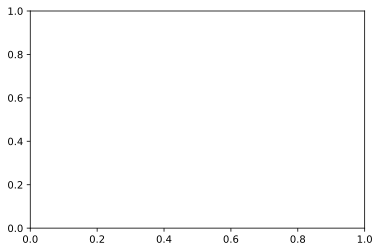

In [67]:
class SVM_1(SVM_0):
    def predict(self, x):
        """
        Predicts the target value `y=1` or `y=-1` for a sample `x`.

        Tip: use the decision function defined above.

        :param x:      input sample (type: numpy array of shape (n_features,))
        :returns:      prediction yhat={-1, 1} (type: int or float)
        """
        a, t, X, b = self.weights
        kernel = self.kernel
        
        # YOUR CODE HERE
        #raise NotImplementedError()
        yhat = np.sign(decision_function(self,x, kernel=kernel))
        return yhat    

svm, data_svm = create_svm_and_data(SVM_1, seed=3)
def painter_function(x):
    t = int(svm.predict(x))
    assert t in [-1, 1]
    
    pred = ["k", "g", "r", "b"][t]
    return pred
plotdata(svm, data_svm, painter_function=painter_function)

In [ ]:
# This cell intentionally left blank, nothing to do here.

<a href=#svm> [go to top SVM] </a>
### Problem 2 (4 Points)<a name="svm_2"/>

Implement the kernel associated with feature mapping $\phi(x) = x^2$


In [68]:
def quadratic_kernel(x_i, x_j):
    """
    Compute the quadratic kernel between two arrays of data.
    
    :param x_i: (type: numpy array)
    :param x_j: (type: numpy array)
    :returns:   quadratic kernel, (type: float or numpy array)
    """
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    k = np.dot(x_i,x_j)**2
        
    return np.asarray(k)

np.testing.assert_array_almost_equal(
    quadratic_kernel(np.array([-0.39730118, 0.01186321]), np.array([-0.47772723, 2.55521607])),
    np.array(0.03694353))

AssertionError: 
Arrays are not almost equal to 6 decimals

Mismatched elements: 1 / 1 (100%)
Max absolute difference: 0.01150693
Max relative difference: 0.31147354
 x: array(0.04845)
 y: array(0.036944)

In [ ]:
svm, data_svm = create_svm_and_data(SVM_0, seed=19, kernel=quadratic_kernel)
plotdata(svm, data_svm, painter_function=lambda x: "orange" if svm.decision_function(x) > 0 else "teal")

In [ ]:
# This cell intentionally left blank, nothing to do here.

<a href=#svm> [go to top SVM] </a>
### Problem 3 (4 Points) <a name="svm_3"/>

Implement a function that returns whether a data point is in the gutter (True, False),, i.e. not outside the margin   $\verb+in_gutter+(x) \rightarrow \{T, F\}$.

In [ ]:
class SVM_3(SVM_0):
    def in_gutter(self, x):
        """
        Predicts whether the point x is within (not outside) the margin.

        :param x:      input sample (type: numpy array of shape (n_features,))
        :returns:      True when the point is in the "gutter" (i.e. in the margin)
        """
        a, t, X, b = self.weights
        kernel = self.kernel
        
        # YOUR CODE HERE
        # raise NotImplementedError()
        
        


In [ ]:
svm, data_svm = create_svm_and_data(SVM_3)
plotdata(svm, data_svm)

In [ ]:
# This cell intentionally left blank, nothing to do here.

<a href=#svm>[go to top SVM]</a>
### Multiple Choice Question (4 Points)<a name="svm_mpc" />

In [69]:
%show_question 3

Determine whether the function $K(\mathbf{x}, \mathbf{z})$ is a valid Kernel, use $\mathbf{x} = [x_1, x_2]^T \in \mathbb{R}^2$ and $\mathbf{z} = [z_1, z_2]^T \in \mathbb{R}^2$. If the Kernel is valid, select its associated feature representation $\phi(\mathbf{x}) \in \mathbb{R}^n$ for some feature size $n$. 
 
$$\quad\quad K(\mathbf{x}, \mathbf{z}) = (\mathbf{x}^T \mathbf{z} + 1)^2 - 3 \mathbf{x}^T \mathbf{z}$$ 
 

 $\phi(\mathbf{x}) = [x_1^2,\ x_2^2,\ \sqrt{2}x_1x_2,\ -x_1,\ -x_2,\ 1]^T$ 

 $\phi(\mathbf{x}) = [x_1^2,\ x_2^2,\ \sqrt{2}x_1x_2,\ -x_1,\ x_2,\ 1]^T$ 

 $\phi(\mathbf{x}) = [x_1^2,\ x_2^2,\ \sqrt{2}x_1x_2,\ x_1,\ x_2,\ 1]^T$ 

 $K$ is not a valid kernel.

In [ ]:
%%answer_for_question 3
answer = 'A','C'

In [ ]:
# This cell intentionally left blank, nothing to do here.

<a href=#overview> [go to Overview] </a>
# Part 4: Neural Networks  <a name='neural_networks' />


- <a href=#neural_networks_1>Problem 1 - ReLU Activation Function (2 Points)</a>
- <a href=#neural_networks_2>Problem 2 - Creating Mini-batches (5 Points)</a>
- <a href=#neural_networks_3>Problem 3 - Mini-batch Gradient Descent (5 Points)</a>
- <a href=#neural_networks_mpc>Multiple Choice Question (3 Points)</a>


You will be building and training a simple neural network (consisting of 1 hidden layer) using numpy, just like you did during the proseminar. A diagram of this simple neural network is provided below, along with the shapes of all the numpy arrays that you will be using. You will be using the [moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) dataset from scikit as before.

However, this time you will be using ReLU as the activation function of the hidden units (function $g_1$ in the diagram). You will also have to implement mini-batch gradient descent (see the explanation in <a href=#neural_networks_2>Problem 2</a>).

<img src="https://iis.uibk.ac.at/public/auddy/images/small_net.svg" alt="Image of Neural Network" width="700">

(Open [this link](https://iis.uibk.ac.at/public/auddy/images/small_net.svg) in a separate tab if the above image does not load.)

Start off by executing the code cell below. This contains all the imports and several functions which you will need. This cell also takes care of preparing the dataset for you. You don't have to worry about the details of the code in this cell, simply run it.

**Execute the below cell (nothing to implement here)**

Shape of x_train: (1200, 2)
Shape of x_test: (300, 2)
Shape of y_train: (1200, 1)
Shape of y_test: (300, 1)


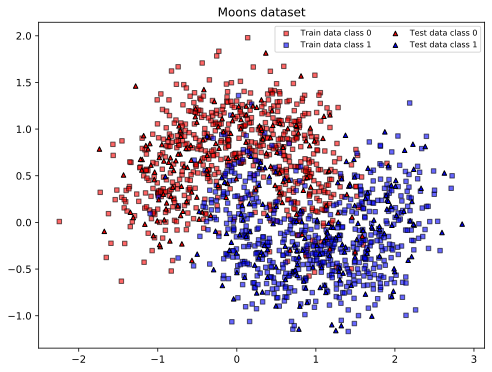

In [70]:
###################### Dataset related function ######################

def create_dataset(n_samples, test_size=0.3, noise=.35, random_seed=123):
    """
    Creates a 2D dataset, splits it into train and test sets with proper shapes
    """
    x,y = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=random_seed) 
    x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                        test_size=test_size,
                                                        random_state=random_seed)
    y_train = np.expand_dims(y_train, axis=1)
    y_test = np.expand_dims(y_test, axis=1)
    return x_train, x_test, y_train, y_test

###################### Network related functions ######################

def init_model(input_dim, output_dim, n_hidden):
    """
    Function for initializing the parameters (weights and biases) of our neural network.
    We are working with a network which has 1 hidden layer and 1 output layer.
    
    param: input_dim: Input dimension (int)
    param: output_dim: Output dimension (int)
    param: n_hidden: Number of hidden units (int)

    returns: parameters:  python dictionary containing the initialized parameters:
                          W1 - numpy array of shape (n_hidden, input_dim)
                          b1 - numpy array of shape (1, n_hidden)
                          W2 - numpy array of shape (output_dim, n_hidden)
                          b2 - numpy array of shape (1, output_dim)
    """    
    W1 = np.random.randn(n_hidden, input_dim) * 0.01
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(output_dim, n_hidden) * 0.01
    b2 = np.zeros((1, output_dim))
    return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

@contract(z='array[AxB],A>0,B>0|float',
          returns='array[AxB],A>0,B>0|float,>=0.0,<=1.0')
def sigmoid_activation(z):
    """
    Computes the sigmoid function. 
    Capable of vectorizing (works for both single floats as well as numpy arrays)
    
    param: z: Input (float or numpy array)
    returns: Sigmoid of input (float or numpy array)
    """
    
    return 1.0 / (1.0 + np.exp(-z))

@contract(A2='array[MxO],M>0,O>0',
          Y='array[MxO],M>0,O>0',
          returns='float, >=0')
def loss(A2, Y, params):
    """
    Computes the binary cross entropy loss
    
    param: A2: The network prediction (numpy array of shape [m,output_dim])
    param: Y: Target labels (numpy array of shape [m,output_dim])
    param: params: python dictionary containing parameters W1, b1, W2 and b2
    
    returns: loss: cross-entropy loss (float)
    """
    eps = np.finfo(np.float).eps
    num_data_points = Y.shape[0]
    logprobs = np.multiply(Y, np.log(A2 + eps)) + np.multiply(1.0 - Y, np.log(1.0 - A2 + eps))
    loss_value = -np.sum(logprobs)/num_data_points    
    loss_value = np.squeeze(loss_value).astype(np.float)
    return loss_value

def update_parameters(parameters, grads, learning_rate = 0.01):
    """
    Updates parameters using the gradient descent update rule given above
    
    param: parameters: python dictionary containing parameters W1, b1, W2 and b2
    param: grads: python dictionary containing gradients dW1, db1, dW2 and db2
    
    returns: parameters: python dictionary containing updated parameters W1, b1, W2 and b2 
    """
    parameters['W1'] -= learning_rate * grads['dW1']
    parameters['b1'] -= learning_rate * grads['db1']
    parameters['W2'] -= learning_rate * grads['dW2']
    parameters['b2'] -= learning_rate * grads['db2']    
    return parameters

@contract(X='array[MxD],M>0,D>0',
          returns='array[Mx1],M>0')
def predict(parameters, X):
    """
    Make predictions (class 0 or 1) using the learned parameters
    
    param: parameters: python dictionary containing parameters W1, b1, W2 and b2
    param: X: Input data for which label is to be predicted (numpy array of shape [m,input_dim])
        
    returns: predictions: Predictions of our model (numpy array of shape [m,1] containing 0s and 1s)
    """
    # Compute probabilities using forward propagation, and classify to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > 0.5
    return predictions.astype(int)

###################### Plotting related functions ######################

def plot_decision_boundary_nn(ax, predict_fn, params, X_train, Y_train, X_test, Y_test, cmap='coolwarm'):
    """
    Plots the decision boundary predicted by the neural network
    """
    markers = ('s', '^', 'x', 'o', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(Y_train))])

    # For constructing the grid limits
    h = 0.02
    x_min, x_max = X_train[:,0].min() - 10*h, X_train[:,0].max() + 10*h
    y_min, y_max = X_train[:,1].min() - 10*h, X_train[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Make predictions for each value inside the grid and reshape
    Z = predict_fn(params, np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    cs = ax.contour(xx, yy, Z, colors='k', alpha=1.0)
    cs.collections[0].set_label("Decision boundary")
    
    for idx, yv in enumerate(np.unique(Y_train[:,0])): 
        ax.scatter(x=X_train[Y_train[:,0]==yv, 0], 
                    y=X_train[Y_train[:,0]==yv, 1], 
                    alpha=0.6, 
                    c=[cmap(idx)], 
                    marker=markers[0], 
                    s=20,
                    label=f"Train data class {yv}",
                    edgecolors='k')

    for idx, yv in enumerate(np.unique(Y_test[:,0])): 
        ax.scatter(x=X_test[Y_test[:,0]==yv, 0], 
                    y=X_test[Y_test[:,0]==yv, 1], 
                    alpha=0.6, 
                    c=[cmap(idx)], 
                    marker=markers[1], 
                    s=20,
                    label=f"Test data class {yv}",
                    edgecolors='k')
    ax.legend(ncol=2, fontsize=8)

    
def plot_dataset(x_train, x_test, y_train, y_test, title):
    """
    Plots the train and test points in a 2D dataset
    """
    plt.figure(figsize=(8,6))
    markers = ('s', '^', 'x', 'o', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y_train))])

    for idx, yv in enumerate(np.unique(y_train[:,0])): 
        plt.scatter(x=x_train[y_train[:,0]==yv, 0], 
                    y=x_train[y_train[:,0]==yv, 1], 
                    alpha=0.6, 
                    c=[cmap(idx)], 
                    marker=markers[0], 
                    label=f"Train data class {yv}",
                    edgecolors='k',
                    s=20)

    for idx, yv in enumerate(np.unique(y_test[:,0])): 
        plt.scatter(x=x_test[y_test[:,0]==yv, 0], 
                    y=x_test[y_test[:,0]==yv, 1], 
                    alpha=1.0, 
                    c=[cmap(idx)], 
                    marker=markers[1], 
                    label=f"Test data class {yv}",
                    edgecolors='k',
                    s=20)

    plt.legend(ncol=2, fontsize=8)
    plt.title(title)
    
########################################################################

# Create the dataset
x_train, x_test, y_train, y_test = create_dataset(n_samples=1500, 
                                                  test_size=0.2, 
                                                  noise=.35, 
                                                  random_seed=random_seed)

plot_dataset(x_train, x_test, y_train, y_test, title='Moons dataset')

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

<a href=#neural_networks> [go to top Neural Networks] </a>
### Problem 1 - ReLU Activation Function (1 + 1 Points)<a name='neural_networks_1' />

#### 1.1 - ReLU Activation Function (1 Point)
ReLU stands for Rectified Linear Units. ReLU provides some benefits over other activation functions such as tanh. This activation function can be implemented using the formula shown below:

$$
R(z) = \begin{cases} z \text{ if $z>0$} \\ 0  \text{ otherwise}\end{cases}
$$

Implement the above formula to complete the `relu` function.

In [ ]:
def relu(Z):
    """
    Computes the ReLU function. 
    Capable of vectorizing (works for both single floats as well as numpy arrays)
    
    Tip: If the input is a float, then the output must also be a float.
         If the input is a numpy array, the output must be a numpy array 
         of the SAME shape.
    
    param: Z: Input (float or numpy array)
    
    returns: A: ReLU of input (float or numpy array)
    """
    
    # YOUR CODE HERE
    # raise NotImplementedError()
    
    return A

In [ ]:
# Test for ReLU

# Test for a single float
inputs = np.random.uniform(-50.0, 50.0, 500)
for ip in inputs:
    if ip>0:
        assert relu(ip)==ip, "relu({ip}) should be {ip}".format(**locals())
    else:
        assert relu(ip)==0.0, "relu({ip}) should be 0".format(**locals())
        
# Test for numpy arrays
np_inputs = np.random.rand(37,49,21)
np_outputs = relu(np_inputs)
assert np_outputs.shape==np_inputs.shape, \
"ReLU output should have the same shape as the input array"


#### 1.2 - Derivative of ReLU (1 Point)
The derivative of the ReLU function (w.r.t. its inputs) can be calculated using the formula shown below:

$$
R'(z) = \begin{cases} 1 \text{ if $z>0$} \\ 0  \text{ otherwise}\end{cases}
$$

*Strictly speaking, the derivative is undefined at 0, but we will ignore that for now.*

Implement the above formula to complete the `relu_backward` function.

In [ ]:
def relu_backward(Z):
    """
    Computes the derivative of the ReLU function with respect to its inputs. 
    Capable of vectorizing (works for both single floats as well as numpy arrays)
    
    Tip: If the input is a float, then the output must be an int (0 or 1).
         If the input is a numpy array, the output must be a numpy array 
         of the SAME shape.
    
    param: Z: Input (float or numpy array)
    
    returns: dZ: Derivative of ReLU (int or numpy array)
    """
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return dZ

In [ ]:
# Test for ReLU Backward

# Test for a single float
inputs = np.random.uniform(-50.0, 50.0, 500)
for ip in inputs:
    if ip>0:
        assert relu_backward(ip)==1, "relu_backward({ip}) should be 1".format(**locals())
    else:
        assert relu_backward(ip)==0.0, "relu_backward({ip}) should be 0".format(**locals())
        
# Test for numpy arrays
np_inputs = np.random.rand(37,49,21)
np_outputs = relu_backward(np_inputs)
assert np_outputs.shape==np_inputs.shape, \
"relu_backward output should have the same shape as the input array"


#### Forward Propagation 
The `forward_propagation` function is provided to you, which performs the following steps:

1. $Z_1 = XW_1^{T} + b_{1}$
2. $A_1 = g_{1}(Z_{1})$ (where $g_{1}$ is the ReLU function)
3. $Z_2 = A_{1}W_2^{T} + b_{2}$
4. $A_2 = g_{2}(Z_{2})$ (where $g_{2}$ is the sigmoid function)

We will use `relu` for $g_{1}$ and `sigmoid_activation` for $g_{2}$.

**Execute the below cell (nothing to implement here)**

In [ ]:
@contract(X='array[MxD],M>0,D>0')
def forward_propagation(X, parameters):
    """
    Forward-propagates the data through the neural network
    
    param: X: Input data (numpy array of shape [m,input_dim])
    param: python dictionary containing the initialized parameters:
                          W1 - numpy array of shape (n_hidden, input_dim)
                          b1 - numpy array of shape (1, n_hidden)
                          W2 - numpy array of shape (output_dim, n_hidden)
                          b2 - numpy array of shape (1, output_dim)
    
    returns: A2: The network prediction (numpy array of shape [m,output_dim])
             cache: python dictionary containing Z1, A1, Z2 and A2
    """
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
         
    Z1 = np.dot(X,W1.T) + b1
    A1 = relu(Z1)  
    Z2 = np.dot(A1, W2.T) + b2
    A2 = sigmoid_activation(Z2)
            
    cache = {'Z1': Z1,
             'A1': A1,
             'Z2': Z2,
             'A2': A2}
    
    return A2, cache

#### Backward Propagation 
The backward function is used for computing the gradients of the trainable parameters (the weights and the biases) of the network. The code for this function is provided to you. It makes use of the `relu_backward` function that you wrote earlier.

**Steps for Backward Propagation**

Here $\odot$ denotes the Hadamard product.

($\text{d}Z_{2}$ stands for $\cfrac{\partial{J}}{\partial{Z_{2}}}$ and so on, where $J$ is the loss)

1. $\text{d}Z_{2} = A_{2} - Y$ (assuming sigmoid function is used in the output layer)
2. $\text{d}W_{2} = \cfrac{1}{m} \text{d}Z_{2}^{T} A_{1}$
3. $\text{d}b_{2} = \cfrac{1}{m}$np.sum($\text{d}Z_{2}$, axis=0, keepdims=True)
4. $\text{d}Z_{1} = (\text{d}Z_{2}W_{2})  \odot (g'_{1}(Z_{1}))$
5. $\text{d}W_{1} = \cfrac{1}{m} \text{d}Z_{1}^{T}X$
6. $\text{d}b_{1} = \cfrac{1}{m}$np.sum($\text{d}Z_{1}$, axis=0, keepdims=True)

Since $g_{1}$ is the `relu` function.

**Execute the below cell (nothing to implement here)**

In [ ]:
def backward_propagation(parameters, cache, X, Y):
    """
    Backward function for computing gradients

    param: parameters: python dictionary containing parameters W1, b1, W2 and b2
    param: cache: python dictionary containing Z1, A1, Z2 and A2
    param: X: Input data (numpy array of shape [m,input_dim])
    param: Y: Target labels (numpy array of shape [m,output_dim])
    
    returns: grads: python dictionary containing gradients dW1, db1, dW2 and db2
    """
    
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary 'parameters'
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    # Retrieve also A1, A2 and Z1 from dictionary 'cache'
    A1 = cache['A1']
    A2 = cache['A2']
    Z1 = cache['Z1']
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2.T, A1)/m
    db2 = np.sum(dZ2, axis=0, keepdims=True)/m
    dZ1 = np.multiply(np.dot(dZ2, W2), relu_backward(Z1))
    dW1 = np.dot(dZ1.T, X)/m
    db1 = np.sum(dZ1, axis=0, keepdims=True)/m
    
    grads = {'dW1': dW1,
             'db1': db1,
             'dW2': dW2,
             'db2': db2}
    
    return grads

<a href=#neural_networks> [go to top Neural Networks] </a>
### Problem 2 - Creating Mini-batches (5 Points)<a name='neural_networks_2' />

In the proseminar, you had used full-batch gradient descent for training your neural network. This meant that the entire training dataset was forward-propagated through the network at the same time to compute the loss. Instead of doing this, now you have to implement mini-batch gradient descent, where the training dataset is divided into smaller chunks called **mini-batches**. During training, at a time only one mini-batch will be forwarded through the network.

Complete the function `get_mini_batches` which shuffles and divides the entire training dataset $(X, Y)$ into a list of smaller chunks called mini-batches $[(X_0, Y_0), (X_1, Y_1), \cdots, (X_{N-1}, Y_{N-1})]$, where $N$ is the number of mini-batches. Follow the detailed comments provided inside the function.



In [ ]:
def get_mini_batches(X, Y, batch_size): 
    """
    Shuffles and splits the training data into a list of mini-batches.
    For simplicity, we will assume that the number of data points in X is an exact
    multiple of batch_size.

    param: X: Input data (numpy array of shape [m,input_dim])
    param: Y: Target labels (numpy array of shape [m,output_dim])
    param: batch_size: Number of data points in each mini-batch (int)
    
    returns: mini_batches: Python list containing mini-batches 
                           (list of tuples [(X0,Y0),...,(Xi,Yi),...] 
                            where each Xi is a numpy array of shape [batch_size,input_dim] 
                            and each Yi is a numpy array of shape [batch_size,output_dim])
    """
    
    assert X.shape[0]%batch_size==0, \
    "The number of data points {X.shape[0]} should be an exact multiple of {batch_size}".format(**locals())
    
    # Calculate the number of mini-batches
    # Store this in the variable called `n_minibatches`
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    # Create a list to store the mini-batches
    mini_batches = [] 
    
    # Calculate input_dim and output_dim
    input_dim = X.shape[1]
    output_dim = Y.shape[1]
    
    # X is of shape (m, input_dim) and Y is of shape (m, output_dim)
    # Stack X and Y horizontally to get an array of shape (m, input_dim+output_dim)
    # Store the result in a variable called `data`
    # Use the `hstack` function from numpy
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    # Randomly shuffle the `data` array
    # Use the `random.shuffle` function from numpy
    # This will shuffle the elements of `data` in the outer-most dimension
    # The resulting shuffled `data` array will still be of shape (m, input_dim+output_dim)
    
    # YOUR CODE HERE
    # raise NotImplementedError()
      
    for i in range(n_minibatches): 
        
        # Select the ith mini_batch from the shuffled `data` (variable should be named `mini_batch`)
        # This `mini_batch` array should have the shape (batch_size, input_dim+output_dim)
        
        # YOUR CODE HERE
        raise NotImplementedError()
        
        assert mini_batch.shape==(batch_size, input_dim+output_dim), \
        "mini_batch must have the shape ({},{}) but its shape is {}".format(batch_size, 
                                                                            input_dim+output_dim, 
                                                                            mini_batch.shape)

        # Split `mini_batch` into `X_mini` and `Y_mini`
        # `X_mini` should have the shape (batch_size, input_dim)
        # For computing `X_mini`, select all rows and the first `input_dim` columns from `mini_batch`
        
        # YOUR CODE HERE
        # raise NotImplementedError()
        
        assert X_mini.shape==(batch_size, input_dim), \
        "X_mini must have the shape ({},{}) but its shape is {}".format(batch_size, input_dim, X_mini.shape)

        # `Y_mini` should have the shape (batch_size, output_dim)
        # For computing `Y_mini`, select all rows and the last `output_dim` columns from `mini_batch`
        # Make sure that `Y_mini` has the shape (batch_size, output_dim)
        
        # YOUR CODE HERE
        #raise NotImplementedError()

        assert Y_mini.shape==(batch_size, output_dim), \
        "Y_mini must have the shape ({},{}) but its shape is {}".format(batch_size, 
                                                                        output_dim, 
                                                                        Y_mini.shape)
        
        # Append the tuple (X_mini, Y_mini) to the list `mini_batches`
        
        # YOUR CODE HERE
        mini_batches.append(X_mini,Y_mini)
 
        # raise NotImplementedError()

    return mini_batches 

In [ ]:
# Test for Mini-batch creation
batch_size=200
mini_batches = get_mini_batches(x_train, y_train, batch_size=batch_size)

for i,mb in enumerate(mini_batches):
    assert mb[0].shape == (batch_size,2), \
    "X for minibatch {i} has incorrect shape {mb[0].shape}".format(**locals())
    assert mb[1].shape == (batch_size,1), \
    "Y for minibatch {i} has incorrect shape {mb[1].shape}".format(**locals())


<a href=#neural_networks> [go to top Neural Networks] </a>
### Problem 3 - Mini-batch Gradient Descent (5 Points)<a name='neural_networks_3' />

Complete the function `train_minibatch`. Detailed comments are provided inside the function to guide you.

In [ ]:
def train_minibatch(X_train, Y_train, n_hidden, learning_rate=0.01, num_epochs=1, batch_size=100):
    """
    Trains the network using mini-batch gradient descent
    
    param: X_train: Training data (numpy array of shape [m,input_dim])
    param: Y_train: Training data labels (numpy array of shape [m,output_dim])
    param: n_hidden: Number of neurons in the hidden layer (int)
    param: learning_rate: Learning rate for gradient descent (float)
    param: num_epochs: Number of epochs (1 epoch = 1 iteration over the dataset) (int)
    param: batch_size: Number of data points in each batch (int)
        
    returns: parameters: Learned parameters - python dictionary containing W1, b1, W2 and b2
    """
       
    # Follow these steps:
    
    # Init params: Call `init_model`
    #              - Input: `X_train.shape[1]`, `Y_train.shape[1]`, `n_hidden`
    #              - Output:`parameters`
    # For each epoch (till `num_epochs` is reached):
    #    Create a list of mini-batches: Call `get_mini_batches`
    #                                   - Input:`X_train`, `Y_train`, `batch_size`
    #                                   - Output: `mini_batch_list`
    #    For each mini-batch in `mini_batch_list`
    #         Get `X_mini`, `Y_mini` from the current mini-batch tuple
    #         Call `forward_propagation`
    #         - Input: `X_mini`, `parameters`
    #         - Output: `A2`, `cache`
    #         Call `loss` 
    #         - Input: `A2`, `Y_mini`, `parameters` 
    #         - Output: `loss_value`
    #         Append `loss_value` to `losses`
    #         Call `backward_propagation`
    #         - Input: `parameters`, `cache`, `X_mini`, `Y_mini` 
    #         - Output: `grads`
    #         Call `update_parameters`
    #         - Input: `parameters`, `grads`, `learning_rate` 
    #         - Output: `parameters`
    # Return `parameters`, `losses`
    
    losses = list()
    
    parameters = init_model(X_train.shape[1], Y_train.shape[1], n_hidden)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
     # Loop
    for i in range(0, num_iterations):
         
        # mini-batch list
        mini_batch_list = get_mini_batches(X_train, Y_train, batch_size)  
            
        # Forward propagation
        A2, cache = forward_propagation(X_mini, parameters)
        
        # Loss function. 
        loss_value = loss(A2, Y_mini, parameters)
        losses.append(loss_value)
 
        # Backpropagation. Inputs: "parameters, cache, X_train, Y_train". Outputs: "grads"
        grads = backward_propagation(parameters, cache, X_mini, Y_mini)
 
        # Gradient descent parameter update. Inputs: "parameters, grads, learning_rate". Outputs: "parameters"
        parameters = update_parameters(parameters, grads, learning_rate)

    

    # YOUR CODE HERE
    # raise NotImplementedError()

    return parameters, losses

In [ ]:
# Test for Mini-batch Gradient Descent
n_hidden = 45
learning_rate=0.03
num_epochs = 500
batch_size=100

# Lets train a network with 3 units in the hidden layer using the moon dataset
params, losses = train_minibatch(x_train, 
                                 y_train, 
                                 n_hidden, 
                                 learning_rate, 
                                 num_epochs, 
                                 batch_size)

assert params["W1"].shape == (n_hidden, x_train.shape[1]), "Shape of params['W1'] is incorrect"
assert params["b1"].shape == (1, n_hidden), "Shape of params['b1'] is incorrect"
assert params["W2"].shape == (y_train.shape[1], n_hidden), "Shape of params['W2'] is incorrect"
assert params["b2"].shape == (y_train.shape[1], 1), "Shape of params['b2'] is incorrect"


In [ ]:
# Plot the decision boundary
fig, ax = plt.subplots(1,1,figsize=(8,5))
plot_decision_boundary_nn(ax, predict, params, x_train, y_train, x_test, y_test)

<a href=#neural_networks>[go to top Neural Networks]</a>
### Multiple Choice Question (3 Points)<a name="neural_networks_mpc" />

In [71]:
%show_question 4

Out of the following functions, which one is not a good choice for the activation function to be used in the hidden layers of a neural network (which is trained using backpropagation and gradient descent): 
 

 $f(x) = $ tanh$(x)$ 

 $f(x) =$ if $x>0$ then $x$, else $0$ 

 $f(x) =$ if $x>0$ then $x$, else $0.01 * x$ 

 $f(x) = -2x$

In [ ]:
%%answer_for_question 4
answer = 'C'

In [ ]:
# This cell intentionally left blank, nothing to do here.

<a href=#overview>[go to Overview]</a>
# Check Multiple Choice Questions <a name="validate_mpc" />
Run the cell below to check whether you have answered all multiple choice questions.

In [ ]:
test.all_questions_answered()